In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
data=pd.read_csv('/content/loan_data.csv', on_bad_lines='skip')

In [97]:
data.head()

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,26556.0,581,8314,79.26,0.0,1.0
1,197392.0,389,111604,22.14,0.0,1.0
2,44561.0,523,34118,45.44,0.0,1.0
3,190363.0,729,118757,10.22,1.0,1.0
4,61853.0,732,19210,44.13,0.0,0.0


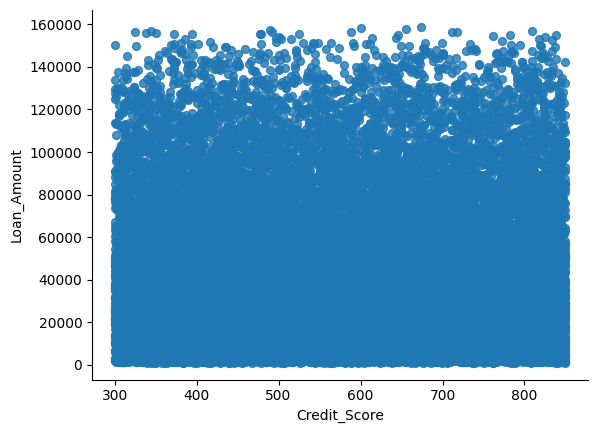

In [98]:
# @title Credit_Score vs Loan_Amount

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Credit_Score', y='Loan_Amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Text               24000 non-null  object 
 1   Income             24000 non-null  float64
 2   Credit_Score       24000 non-null  object 
 3   Loan_Amount        23999 non-null  object 
 4   DTI_Ratio          23998 non-null  float64
 5   Employment_Status  23998 non-null  object 
 6   Approval           23998 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.3+ MB


In [ ]:
data.drop(columns=["Text"],inplace=True)

In [ ]:
data.head()

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,26556.0,581,8314,79.26,employed,Rejected
1,197392.0,389,111604,22.14,employed,Rejected
2,44561.0,523,34118,45.44,employed,Rejected
3,190363.0,729,118757,10.22,unemployed,Rejected
4,61853.0,732,19210,44.13,employed,Approved


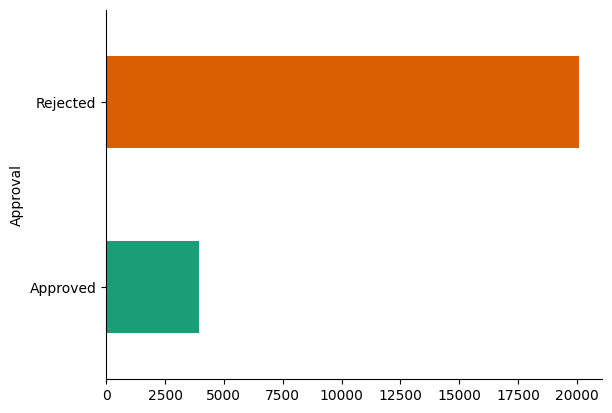

In [ ]:
# @title Approval

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Approval').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

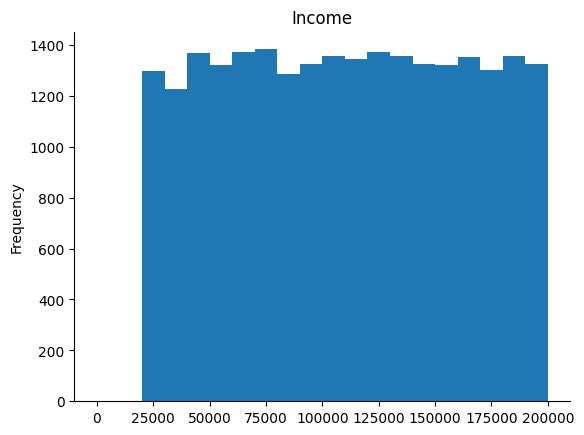

In [ ]:
# @title Income
from matplotlib import pyplot as plt
data['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.dropna(inplace=True,axis=0)

In [ ]:
#data.info()
data.head()

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,26556.0,581,8314,79.26,employed,Rejected
1,197392.0,389,111604,22.14,employed,Rejected
2,44561.0,523,34118,45.44,employed,Rejected
3,190363.0,729,118757,10.22,unemployed,Rejected
4,61853.0,732,19210,44.13,employed,Approved


In [ ]:
encoding = OrdinalEncoder()# Set sparse_output to False to get a dense array directly
data['Employment_Status']= encoding.fit_transform(data[['Employment_Status']])
data['Approval']=encoding.fit_transform(data[['Approval']])

# Get the new column names
#encoded_column_names = encoding.get_feature_names_out(['Employment_Status'])

# Create a DataFrame from the encoded array with appropriate column names
#encoded_df = pd.DataFrame(encoded_employment, columns=encoded_column_names, index=data.index)

# Concatenate the original DataFrame with the new encoded columns
#data = pd.concat([data, encoded_df], axis=1)

# Drop the original 'Employment_Status' column
#data.drop(columns=['Employment_Status'], inplace=True)

display(data.head())

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,26556.0,581,8314,79.26,0.0,1.0
1,197392.0,389,111604,22.14,0.0,1.0
2,44561.0,523,34118,45.44,0.0,1.0
3,190363.0,729,118757,10.22,1.0,1.0
4,61853.0,732,19210,44.13,0.0,0.0


In [ ]:
data['Income']=pd.to_numeric(data['Income'],errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23998 entries, 0 to 23998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             23998 non-null  float64
 1   Credit_Score       23998 non-null  object 
 2   Loan_Amount        23998 non-null  object 
 3   DTI_Ratio          23998 non-null  float64
 4   Employment_Status  23998 non-null  float64
 5   Approval           23998 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.3+ MB


In [ ]:
data['Credit_Score']=pd.to_numeric(data['Credit_Score'],errors='coerce')

In [ ]:
data['Loan_Amount']=pd.to_numeric(data['Loan_Amount'],errors='coerce')

In [ ]:
X=data.drop(columns=['Approval'],axis=1)
y=data['Approval']

In [ ]:
x_test,x_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
test=model.predict(x_test)

In [ ]:
model.score(x_test,y_test)

0.9141577247629962

In [ ]:
model.score(x_train,y_train)

0.920625

In [ ]:
precision_score(y_test,test)

0.9457431636386184

In [ ]:
recall_score(y_test,test)

0.9517628705148206

In [ ]:
f1_score(y_test,test)

0.9487434685245086